In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [160]:
plt.rcParams['figure.figsize'] = [12, 8]

# Modelo Supervisado

In [161]:
BaseSuper = pd.read_excel("Modelo Supervisado.xlsx")

In [84]:
BaseSuper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107039 entries, 0 to 107038
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Id_Tabla                  107039 non-null  int64  
 1   Levdireccion              107039 non-null  float64
 2   Levdirnum                 107039 non-null  float64
 3   Levpropietario            107039 non-null  float64
 4   Levtelefono               107039 non-null  int64  
 5   Lev_Sticker               107039 non-null  int64  
 6   Levnombreestablecimiento  107022 non-null  float64
 7   Distancia En Metros       101851 non-null  float64
 8   Match                     107039 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.3 MB


### Aquí podemos observar que la variable "Levnombreestablecimiento" y "Distancia en metros" tienen 17 y 5171 valore nulos respectivamente.

In [85]:
BaseSuper["Match"] = BaseSuper["Match"].astype(str)
BaseSuper.Match.value_counts()/sum(BaseSuper.Match.value_counts())

0    0.934267
1    0.065733
Name: Match, dtype: float64

### Además calaramente se nota una desproporción entre las categorías de la variable de clasificación

# Imputación de datos

### El proceso que se llevará a cabo para la imputación de datos es rellenar los valores nulos con la media de las variables


In [86]:
values0 = {'Levnombreestablecimiento': BaseSuper[BaseSuper.Match == '0'].Levnombreestablecimiento.mean(), 'Distancia En Metros': BaseSuper.loc[BaseSuper.Match == '0', "Distancia En Metros"].mean()}
values1 = {'Levnombreestablecimiento': BaseSuper[BaseSuper.Match == '1'].Levnombreestablecimiento.mean(), 'Distancia En Metros': BaseSuper.loc[BaseSuper.Match == '1', "Distancia En Metros"].mean()}

In [87]:
BaseSuper[BaseSuper.Match == '0'] = BaseSuper[BaseSuper.Match == '0'].fillna(values0)
BaseSuper[BaseSuper.Match == '1'] = BaseSuper[BaseSuper.Match == '1'].fillna(values1)

In [88]:
BaseSuper

,Id_Tabla,Levdireccion,Levdirnum,Levpropietario,Levtelefono,Lev_Sticker,Levnombreestablecimiento,Distancia En Metros,Match
0,1,1.000000,0.933333,0.428571,0,0,1.000000,13.960982,1
1,2,1.000000,1.000000,0.740741,0,0,0.388889,13.960982,1
2,3,0.848485,0.900000,0.541667,0,0,1.000000,21.466099,1
3,4,0.806452,0.833333,0.457143,0,0,1.000000,1.705346,1
4,5,1.000000,1.000000,0.500000,0,0,0.950000,27.561843,1
...,...,...,...,...,...,...,...,...,...
107034,107035,0.700000,0.777778,0.410256,0,0,0.500000,14.399315,0
107035,107036,0.766667,0.777778,0.425000,0,0,0.583333,14.399315,0
107036,107037,0.861111,0.850000,0.523810,0,0,0.545455,44.386999,0
107037,107038,0.766667,0.833333,0.425000,0,0,0.555556,12.524179,0


# Análisis descriptivo

In [89]:
MeanTable = BaseSuper.groupby("Match").mean().drop(["Id_Tabla", "Distancia En Metros"], axis = 1).transpose()
MeanTableDist = BaseSuper.groupby("Match").mean()["Distancia En Metros"].transpose()
MeanTableDist = pd.DataFrame(MeanTableDist).transpose()

In [90]:
pos = np.arange(MeanTable.shape[0])
bar_width = 0.35

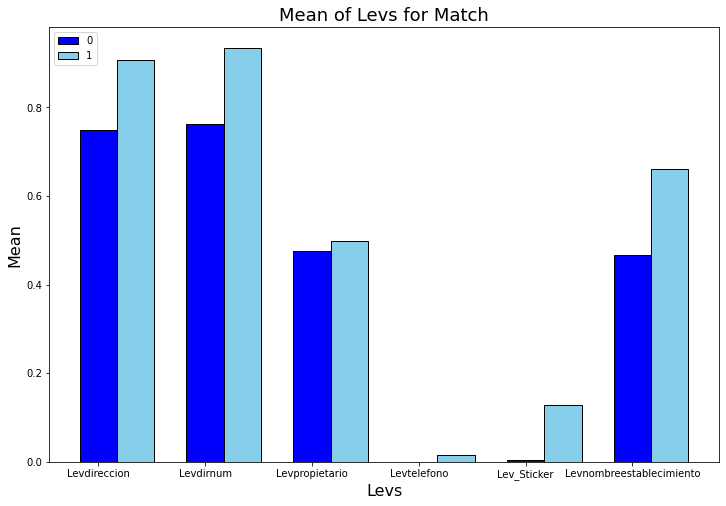

In [91]:
plt.bar(pos,MeanTable.iloc[:,0],bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,MeanTable.iloc[:,1],bar_width,color='skyblue',edgecolor='black')
plt.xticks(pos, list(MeanTable.index))
plt.xlabel('Levs', fontsize=16)
plt.ylabel('Mean', fontsize=16)
plt.title('Mean of Levs for Match',fontsize=18)
plt.legend(list(MeanTable.columns),loc=2)
plt.show()

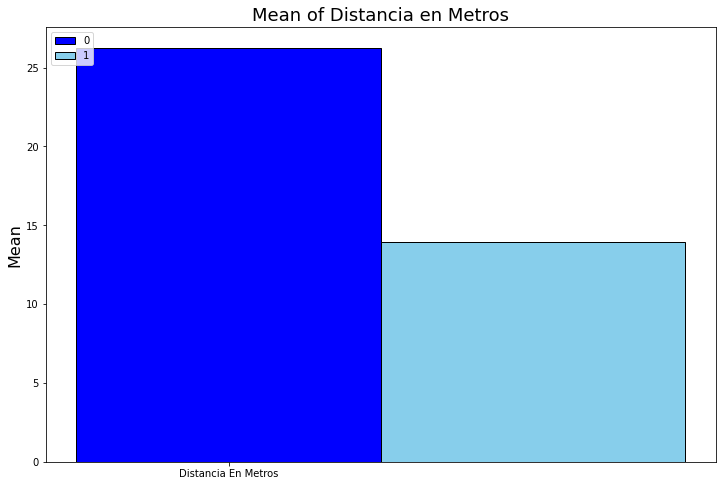

In [92]:
plt.bar([0],MeanTableDist.iloc[:,0],bar_width,color='blue',edgecolor='black')
plt.bar([0.35],MeanTableDist.iloc[:,1],bar_width,color='skyblue',edgecolor='black')
plt.xticks([0], list(MeanTableDist.index))
plt.ylabel('Mean', fontsize=16)
plt.title('Mean of Distancia en Metros',fontsize=18)
plt.legend(list(MeanTableDist.columns),loc=2)
plt.show()

### De los anteriores gráficos se pueden deducir algunas cosas como, todas las variables "Levs" exceptuando Levtelefono y LevPropietario tienen una diferencia en promedio importante lo cual nos puede ayudar a dar conclusiones superficiales de como se comportan los datos, y una de estas podría ser que, aquellos registros que tienen valores mayores a 0.8 tanto en LevDireccion como en LevDirnum y mayores a 0.5 en Levnombreestablecimiento pertenecen a la categoría 1 de Match

### Por otro lado la Distancia en metros nos dice que los registros de la categoría 1 son mas cercanos que aquellos registros pertenecientes a la categoría 0.

# Estructuración del modelo


### Dividimos la muestra de datos en train y test

In [124]:
train_set, test_set = train_test_split(BaseSuper, test_size=0.2,
random_state=42)

###  Debido a la desproporción tan importante que existe en la categoría de clasificación ("Match"), podemos observar que es necesario usar técnicas como remuestreo que ayuden a diferenciar mejor las categoría y de esta manera obtener un mejor resultado en el modelo.

In [125]:
train_set.Match.value_counts()/sum(train_set.Match.value_counts())

0    0.93444
1    0.06556
Name: Match, dtype: float64

### En esta parte realizaremos el remuestreo de la información 

In [95]:
train1 = train_set[train_set.Match == '1'].sample(n = round(0.9*train_set[train_set.Match == '0'].shape[0]), replace = True, random_state = 6012021)

In [96]:
train1

,Id_Tabla,Levdireccion,Levdirnum,Levpropietario,Levtelefono,Lev_Sticker,Levnombreestablecimiento,Distancia En Metros,Match
234,235,1.000000,1.000000,0.477273,0,0,0.470588,13.960982,1
2899,2900,0.814815,0.888889,0.800000,0,0,0.200000,13.960982,1
6011,6012,0.925926,0.928571,0.536585,0,0,0.761905,6.794598,1
3481,3482,0.972973,0.933333,0.555556,0,0,0.857143,13.960982,1
6960,6961,0.823529,1.000000,0.475000,0,0,0.869565,8.257512,1
...,...,...,...,...,...,...,...,...,...
1694,1695,0.777778,0.736842,0.565217,0,1,1.000000,6.769089,1
5404,5405,0.916667,0.933333,0.555556,0,0,1.000000,0.553562,1
2155,2156,0.909091,0.875000,0.560976,0,0,0.823529,3.664184,1
3938,3939,1.000000,1.000000,0.526316,0,0,0.689655,13.960982,1


### train_set_r será la base de datos remuestreada

In [126]:
train_set_r = pd.concat([train_set[train_set.Match == '0'], train1])

### En principio procederemos entonces a realizar el ajuste del modelo con la base de datos sin remuestrear, observaremos los resultados y posteriormente se realizará la comparación con la base de datos remuestreada

### Vamos a usar un RandomForest para la clasificación sin la base remuestreada

In [127]:
X_test = test_set.drop(["Id_Tabla", "Match"], axis = 1).values
X_train = train_set.drop(["Id_Tabla", "Match"], axis = 1).values
y_test = test_set["Match"].values.reshape(-1, 1)
y_train = train_set["Match"].values.reshape(-1, 1)

In [146]:
random.seed(6012021)
forest_cla = RandomForestClassifier()

In [147]:
forest_cla.fit(X_train, y_train)

<ipython-input-147-aa9cbcd7105f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_cla.fit(X_train, y_train)


RandomForestClassifier()

In [148]:
y_pred=forest_cla.predict(X_test)

In [149]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9757567264573991


### Obtenemos una precisión del 97.6% sin el remuestreo de la información

[[0.98889222 0.01110778]
 [0.20886076 0.79113924]]


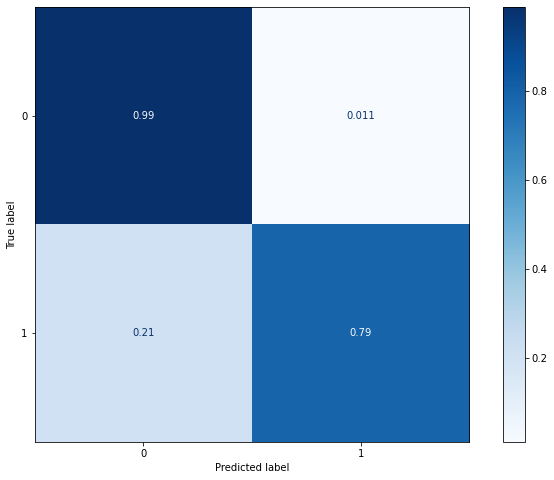

In [150]:
disp = plot_confusion_matrix(forest_cla, X_test, y_test,
                                 display_labels=["0", "1"],cmap=plt.cm.Blues, normalize = 'true')

print(disp.confusion_matrix)
    
plt.show()

### Podemos observar que el porcentaje de calsificación para la categoría 1 es del 98.9% y para la categoría 0, del 79.1%


In [151]:
importance = forest_cla.feature_importances_
# summarize feature importance
for i,v in zip(list(test_set.drop(["Id_Tabla", "Match"], axis = 1).columns), importance):
    print('Feature: %a , Score: %.5f' % (i,v))

Feature: 'Levdireccion' , Score: 0.16602
Feature: 'Levdirnum' , Score: 0.27192
Feature: 'Levpropietario' , Score: 0.07466
Feature: 'Levtelefono' , Score: 0.00392
Feature: 'Lev_Sticker' , Score: 0.02784
Feature: 'Levnombreestablecimiento' , Score: 0.26114
Feature: 'Distancia En Metros' , Score: 0.19450


### Observamos que las variables mas importantes son Levdirnum, Levnombreestablecimiento  y Distancia en metros, que si lo analizamos bien es un resultado que soporta las conclusiones superficiales que se realizaron con el análisis descriptivo.

### Vamos a usar un RandomForest para la clasificación con la base REMUESTREADA


In [152]:
X_test = test_set.drop(["Id_Tabla", "Match"], axis = 1).values
X_train = train_set_r.drop(["Id_Tabla", "Match"], axis = 1).values
y_test = test_set["Match"].values.reshape(-1, 1)
y_train = train_set_r["Match"].values.reshape(-1, 1)

In [153]:
forest_cla.fit(X_train, y_train)

<ipython-input-153-aa9cbcd7105f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_cla.fit(X_train, y_train)


RandomForestClassifier()

In [154]:
y_pred=forest_cla.predict(X_test)

In [155]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9758034379671151


### Obtenemos una precisión del 97.6% con el REMUESTREO de la información

[[0.9861403  0.0138597 ]
 [0.16947961 0.83052039]]


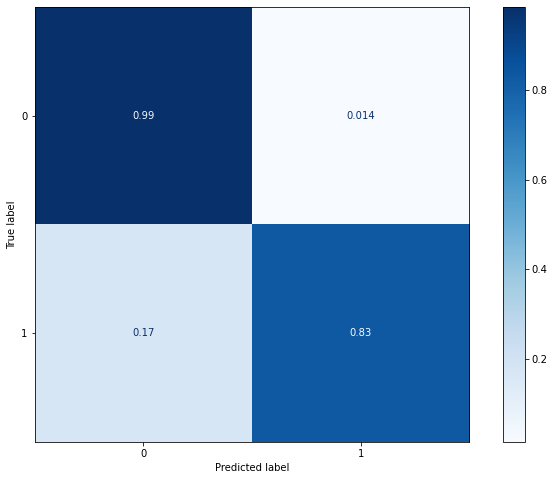

In [156]:
disp = plot_confusion_matrix(forest_cla, X_test, y_test,
                                 display_labels=["0", "1"],cmap=plt.cm.Blues, normalize = 'true')

print(disp.confusion_matrix)
    
plt.show()

### Podemos observar que el porcentaje de calsificación para la categoría 1 es del 98.6% y para la categoría 0, del 83%, por ende, este modelo se considera un MEJOR modelo dada su matriz de confusión, ya que a diferencia del modelo sin la base remuestreada, hay 2.6% de mayor precisión en la categoría 0.

In [157]:
importance = forest_cla.feature_importances_
# summarize feature importance
for i,v in zip(list(test_set.drop(["Id_Tabla", "Match"], axis = 1).columns), importance):
    print('Feature: %a , Score: %.5f' % (i,v))

Feature: 'Levdireccion' , Score: 0.13755
Feature: 'Levdirnum' , Score: 0.34836
Feature: 'Levpropietario' , Score: 0.04629
Feature: 'Levtelefono' , Score: 0.00255
Feature: 'Lev_Sticker' , Score: 0.02603
Feature: 'Levnombreestablecimiento' , Score: 0.23004
Feature: 'Distancia En Metros' , Score: 0.20917


### Observamos que las variables mas importantes son Levdirnum, Levnombreestablecimiento  y Distancia en metros, que si lo analizamos bien es un resultado que soporta las conclusiones superficiales que se realizaron con el análisis descriptivo.

# En conlusión el modelo óptimo de clasificación es el realizado por medio del remuestreo de la información, esta técnica permite obtener una caracterización mucho más importante de la información.


# Muchas gracias